<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686/blob/22F8W2/MSDS%20686/Week_3/MNST_Regularization_and_Dropout_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the MNIST diget dataset to classify digits 0 - 9 into 10 different categories.  Use regularization and early stopping call backs to improve your neural network.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
# Import all the necessary libraries 
import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend

In [ ]:
# Import the MNST data set from the Keras library. https://keras.io/datasets/
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape and normalize the images for your neural net
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/test_images.max()

In [ ]:
# Convert the labels into categorial values.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Split the data into training and validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

# In each Jupiter Notebook cell build a model using your test and validation data, show loss and accuracy monitoring graphs, and evaluate your model on the test data all in one cell.  

# Build at least 7 different models. Comment in the cell or use markdown above the code cell to explain what you are changing/testing in the subsiquent model. 

# Build models with different learning rates, batch sizes, dropout, and hidden layers and nodes.  Be strategic in how you go about optomizing your model. The last model of your notebook should be your best model. 


Epoch 1/100
352/352 - 2s - loss: 0.4322 - accuracy: 0.8655 - val_loss: 0.1559 - val_accuracy: 0.9530 - 2s/epoch - 7ms/step
Epoch 2/100
352/352 - 1s - loss: 0.1833 - accuracy: 0.9459 - val_loss: 0.1194 - val_accuracy: 0.9655 - 1s/epoch - 4ms/step
Epoch 3/100
352/352 - 2s - loss: 0.1374 - accuracy: 0.9587 - val_loss: 0.1002 - val_accuracy: 0.9708 - 2s/epoch - 4ms/step
Epoch 4/100
352/352 - 2s - loss: 0.1152 - accuracy: 0.9662 - val_loss: 0.1014 - val_accuracy: 0.9725 - 2s/epoch - 4ms/step
Epoch 5/100
352/352 - 2s - loss: 0.0979 - accuracy: 0.9713 - val_loss: 0.0963 - val_accuracy: 0.9737 - 2s/epoch - 4ms/step
Epoch 6/100
352/352 - 2s - loss: 0.0908 - accuracy: 0.9739 - val_loss: 0.0933 - val_accuracy: 0.9769 - 2s/epoch - 4ms/step
Epoch 7/100
352/352 - 1s - loss: 0.0799 - accuracy: 0.9779 - val_loss: 0.0994 - val_accuracy: 0.9762 - 1s/epoch - 4ms/step
Epoch 8/100
352/352 - 2s - loss: 0.0722 - accuracy: 0.9796 - val_loss: 0.0906 - val_accuracy: 0.9785 - 2s/epoch - 4ms/step
Epoch 9/100
352/

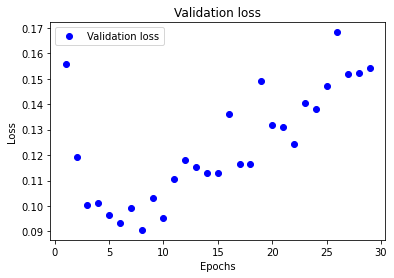

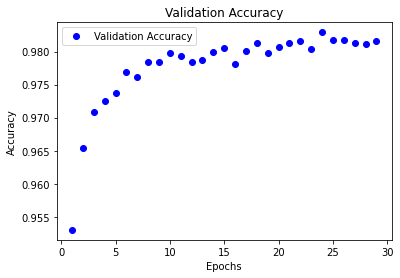

313/313 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9825
['loss', 'accuracy']
[0.11548136174678802, 0.9825000166893005]


In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (train_images.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer=keras.optimizers.RMSprop(0.0004),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,
              y_train,
              epochs = 100,
              batch_size = 128,
              validation_data = (x_val, y_val),
              verbose = 2,
              callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, val_loss_values, 'bo', label = 'Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, val_acc_values, 'bo', label = 'Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_images, test_labels)
print(model.metrics_names)
print(results)

### Comment on which techniques/methods you used to build the best model with the highest accuracy.  